# Task 4

#### Action I

contains chemical analysis results of wines grown in the same region of Italy but derived from three different cultivars (grape varieties). It is commonly used for classification, clustering, and dimensionality reduction experiments.

Attribute types: Continuous real-valued features such as alcohol percentage, malic acid concentration, ash, magnesium, flavanoids, proanthocyanins, and color intensity.

Key attributes include:
Alcohol
Malic acid
Ash
Alcalinity of ash
Magnesium
Total phenols
Flavanoids
Nonflavanoid phenols
Proanthocyanins
Color intensity
Hue
OD280/OD315 of diluted wines
Proline


#### Action II

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
columns = [
    "Class", "Alcohol", "Malic_acid", "Ash", "Alcalinity_of_ash", "Magnesium",
    "Total_phenols", "Flavanoids", "Nonflavanoid_phenols", "Proanthocyanins",
    "Color_intensity", "Hue", "OD280/OD315", "Proline"
]
df = pd.read_csv(url, header=None, names=columns)

X = df.drop(columns=["Class"])
y = df["Class"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Action III

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#### Action IV

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy (PCA features): {acc:.4f}")

Logistic Regression Accuracy (PCA features): 0.9815


#### Action V

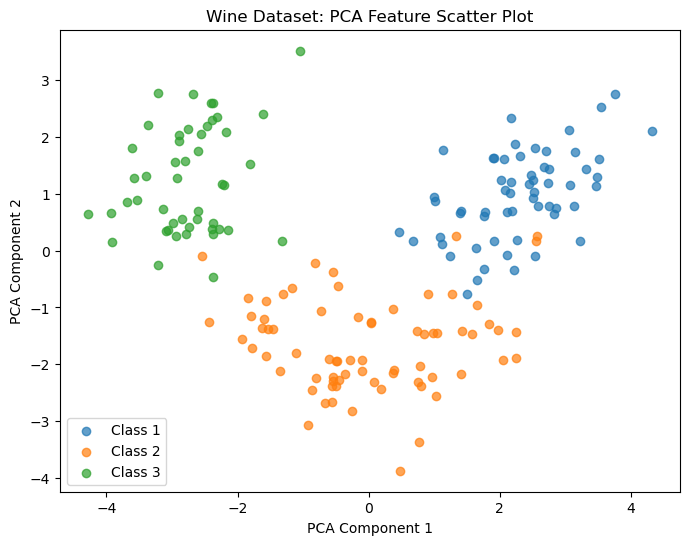

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
for class_value in np.unique(y):
    plt.scatter(
        X_pca[y == class_value, 0],
        X_pca[y == class_value, 1],
        label=f"Class {class_value}",
        alpha=0.7
    )
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Wine Dataset: PCA Feature Scatter Plot")
plt.legend()
plt.show()